<h1>
<center>CFRM 421/521, Spring 2022</center>
</h1>

<h1>
<center>Wendy Jiang</center>
</h1>

<h1>
<center>Homework 3</center>
</h1>

* **Due: Monday, May 16, 2022, 11:59 PM**


* Total marks: 37


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as one Jupyter notebook on Canvas and one PDF file on Gradescope.** The notebook must be already run, that is, make sure that you have run all your code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. Applying PCA [6 marks]

## (a) [4 marks]
Train a SVM classifier with a Gaussian RBF kernel on the MNIST training data (the first 60,000 observations). Use the default arguments for the classifier. Take the first 10,000 observations as the training set given by `X_train_red` and `y_train_red` in the code below. Time your training using `%time` and report the accuracy of the trained model on the test set (the last 10,000 observations of MNIST). Now, use PCA on the original training set (60,0000 observations) to find principal components with an explained variance ratio of 60%. Retrain the SVM classifier using these principal components instead of the original features. Time the training and accuracy on the test set. Comment on whether PCA helped or not. Do not shuffle the data and do not use a standard scaler.

In [2]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X_train = mnist["data"][:60000]
X_test  = mnist["data"][60000:]
y_train = mnist["target"][:60000]
y_test  = mnist["target"][60000:]
X_train_red = mnist["data"][:10000]
y_train_red = mnist["target"][:10000]

**[Add your solution here]**

In [3]:
from sklearn.svm import SVC

rbf_kernel_clf = SVC(kernel="rbf")
%time rbf_kernel_clf.fit(X_train_red, y_train_red)

CPU times: user 18.5 s, sys: 82.4 ms, total: 18.6 s
Wall time: 18.6 s


SVC()

In [4]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, rbf_kernel_clf.predict(X_test))

0.9594

The accuracy on the test set of SVM classifier with a Gaussian RBF kernel is 0.9594.

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.6)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

17

After using the PCA on the original training set, we have 17 principal components with an explained variance ratio of 60%.

In [6]:
rbf_kernel_svm_clf = SVC(kernel="rbf")
%time rbf_kernel_svm_clf.fit(X_reduced, y_train)

CPU times: user 7.49 s, sys: 103 ms, total: 7.59 s
Wall time: 7.68 s


SVC()

In [7]:
X_test_pca = pca.transform(X_test)
y_pred = rbf_kernel_svm_clf.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.9723

The accuracy on the test set of the SVM classifier using these principal components is 0.9723. The PCA helped to save time and increase accuracy.

## (b) [2 marks]

Repeat (a) using a random forest classifier instead of the SVM classifier and comment on the result. Use `random_state=42` in the classifier and use the default for the other arguments. You are allowed to use `n_jobs=-1`.

**[Add your solution here]**

In [8]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
%time rnd_clf.fit(X_train_red,y_train_red)

CPU times: user 5.5 s, sys: 144 ms, total: 5.64 s
Wall time: 1.1 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [9]:
accuracy_score(y_test, rnd_clf.predict(X_test))

0.9504

The accuracy of random forest classifier is 0.9504.

In [10]:
rnd_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
%time rnd_clf.fit(X_reduced, y_train)

CPU times: user 34.3 s, sys: 271 ms, total: 34.6 s
Wall time: 5.63 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [11]:
X_test_pca = pca.transform(X_test)
y_pred = rnd_clf.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.943

The accuracy is 0.943, it is much lower after using PCA. Then the PCA is not helped.

# 2. Visualizing dimensionality reduction [8 marks]

## (a) [3 marks]
Load the MNIST dataset and take only the first 10,000 observations as `X` and `y`. Use the nonlinear dimensionality reduction technique **t-SNE** to reduce this subset of the MNIST dataset down to 2 dimensions. Include the argument `random_state=42`. Measure how long it took to reduce the dimensionality, this will be used in (b) below. Plot a scatterplot of the outcome of t-SNE. Use 10 different colors to represent each image's target class and plot scaled-down versions of the digit images themselves. The visualization will be too cluttered if you draw the image for every observation, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance. You should get a nice visualization of different classes and some of the digit images in them. Use the plot to comment on which classes are easily identified and which ones can be hard to distinguish.

Hint: It is helpful to read page 233 of the textbook for information about t-SNE, and see the solution of Chapter 8, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/08_dimensionality_reduction.ipynb) on the textbook website to see how to implement t-SNE and produce these plots using the `plot_digits()` function.

**[Add your solution here]**

In [12]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X = mnist["data"][:10000]
y = mnist["target"][:10000]

In [13]:
from sklearn.manifold import TSNE
import time
tsne = TSNE(n_components=2, random_state=42)
t0 = time.time()
X_reduced_tsne = tsne.fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))

PCA took 136.8s.


The nonlinear dimensionality reduction technique t-SNE took 136s to reduce the dimensionality

In [14]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

**Here is the scatterplot of the outcome of t-SNE:**

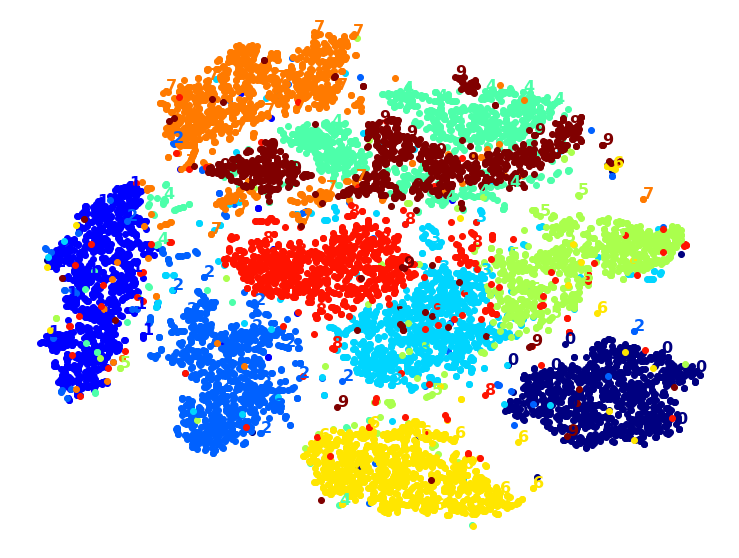

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plot_digits(X_reduced_tsne, y)

**plot scaled-down versions of the digit images themselves:**

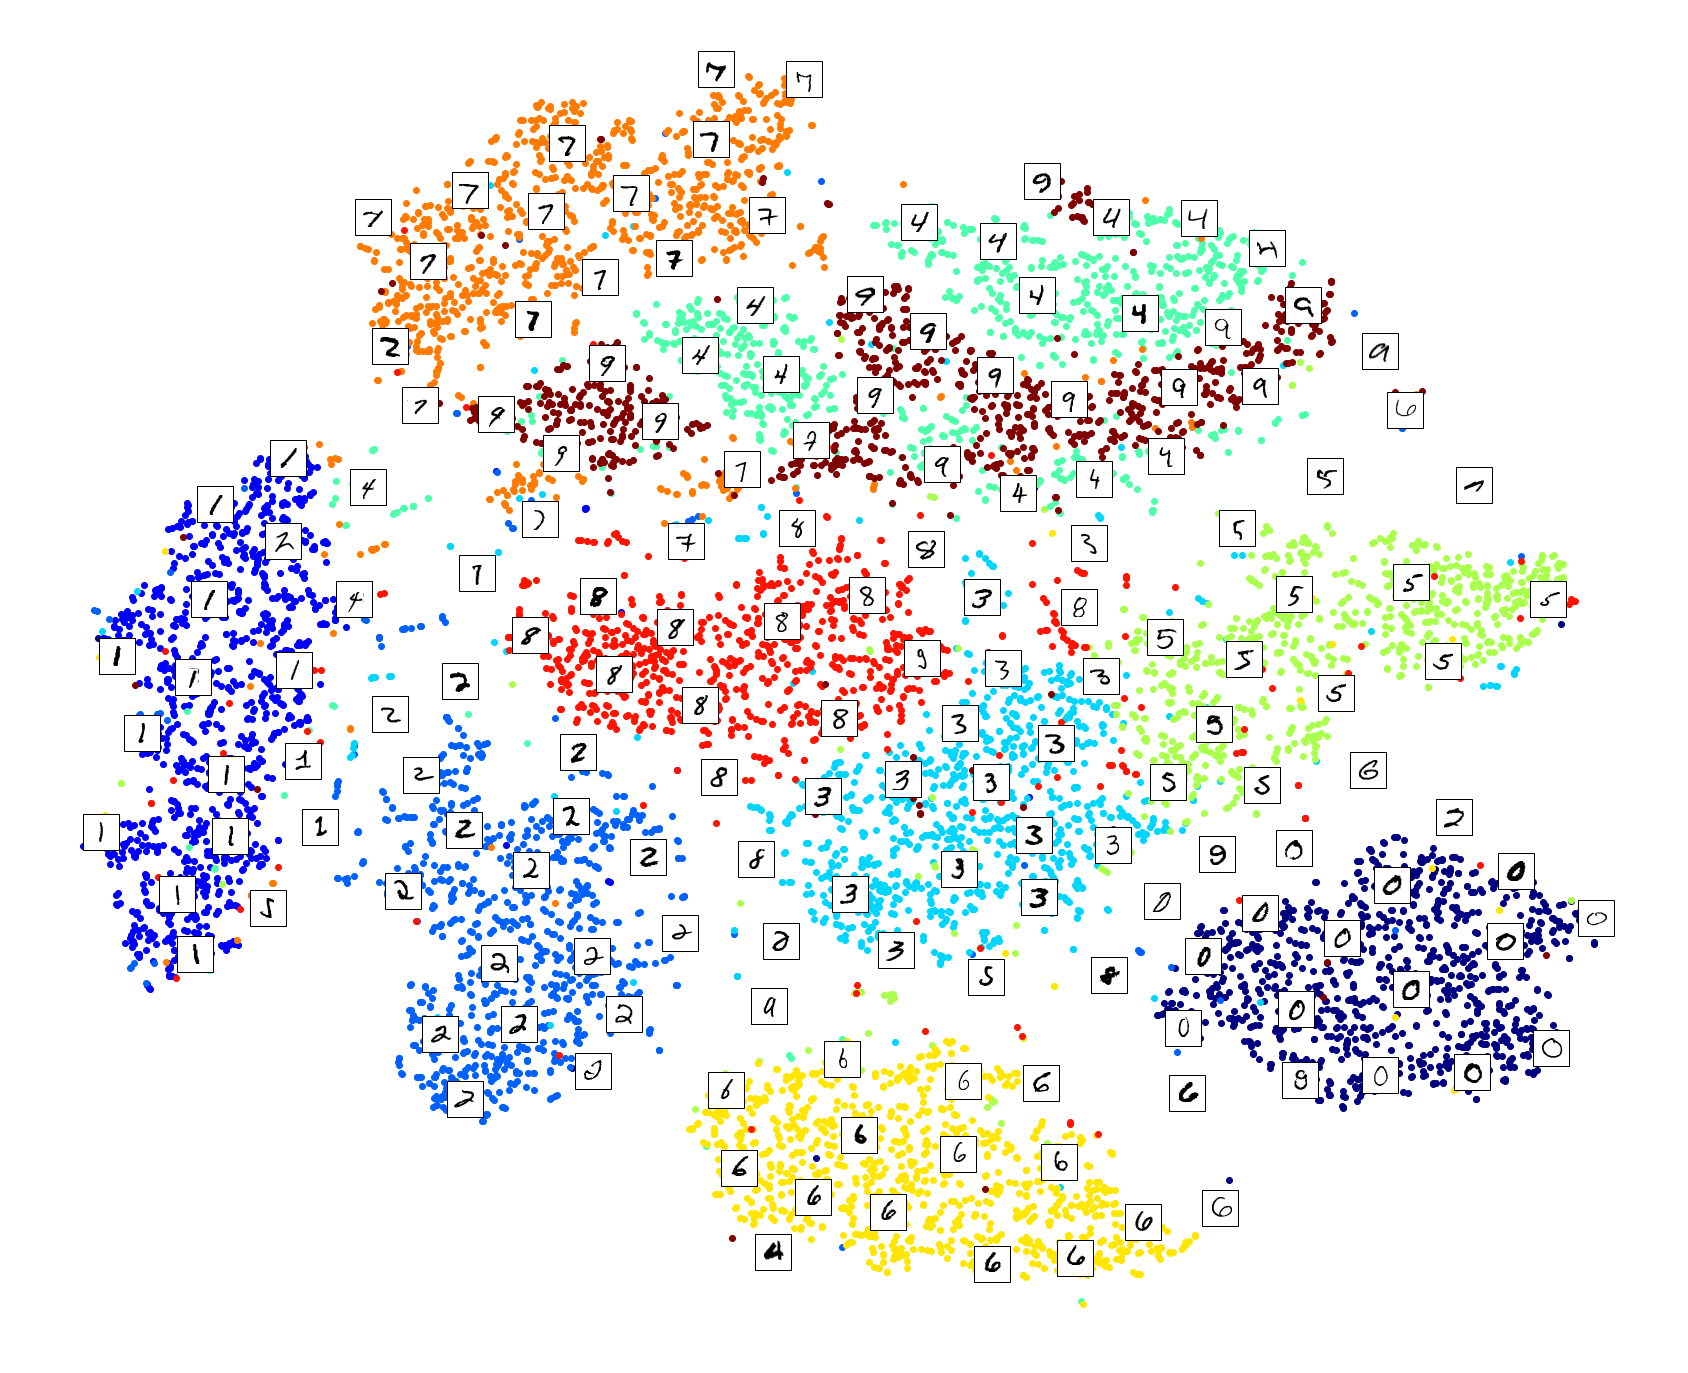

In [16]:
plot_digits(X_reduced_tsne, y,images=X, figsize=(30, 25))

The class 0 and 6 are easily identified and class 8 and 9 can be hard to distinguish.

**Pick random class:**

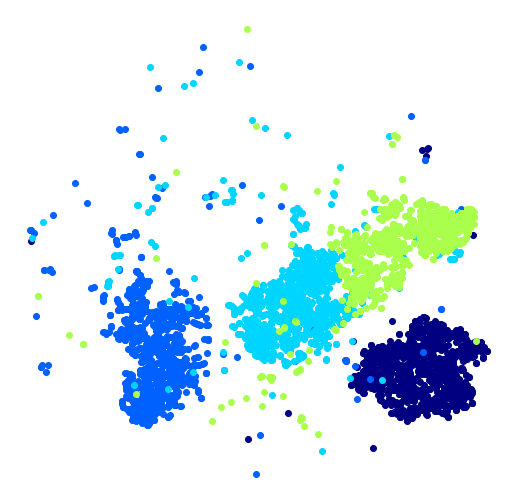

In [18]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (0, 2, 3, 5):
    plt.scatter(X_reduced_tsne[y == digit, 0], X_reduced_tsne[y == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

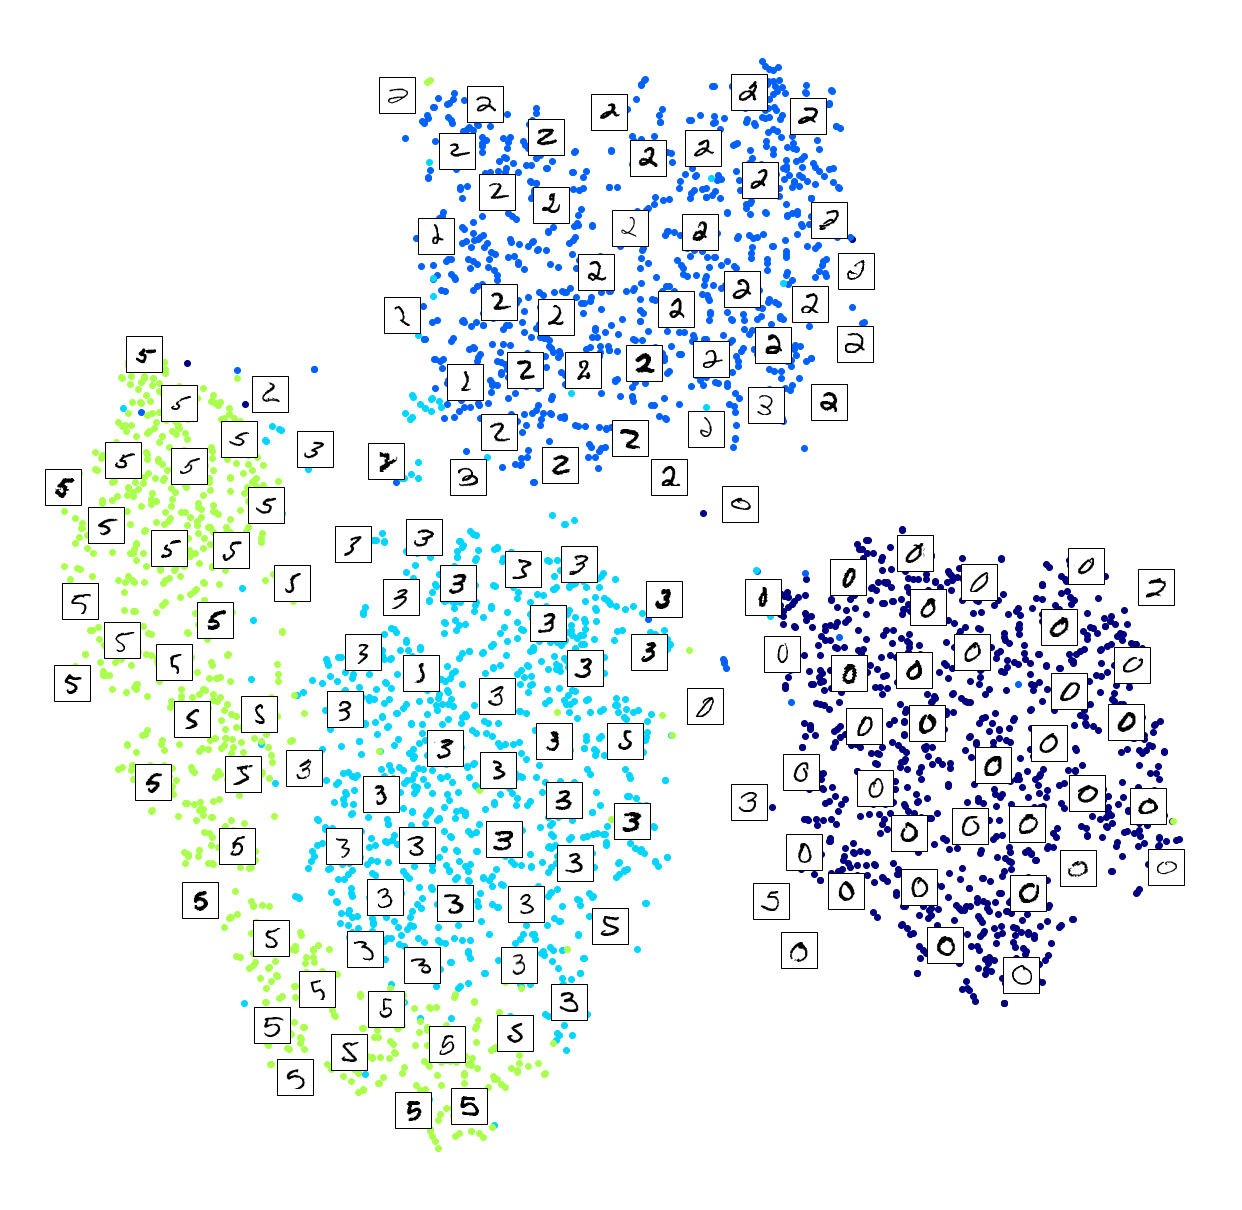

In [19]:
idx = (y == 0)| (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

## (b) [5 marks]
Try using other dimensionality reduction methods. Specifically, try:

* Regular PCA to reduce to 2 dimensions.
* LLE to reduce to 2 dimensions.
* First apply PCA with an explained variance ratio of 95%, then apply t-SNE to reduce to 2 dimensions.

For each algorithm, include the argument `random_state=42`. Then for each of the three methods above, report how long it took to reduce the dimension. Also, provide a 2D plot of the results. Which method runs faster? Which one results in a better visualization? Include t-SNE from (a) as part of your comparison.

**[Add your solution here]**

**Regular PCA to reduce to 2 dimensions:**

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
t0 = time.time()
X_reduced_pca = pca.fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))

PCA took 0.4s.


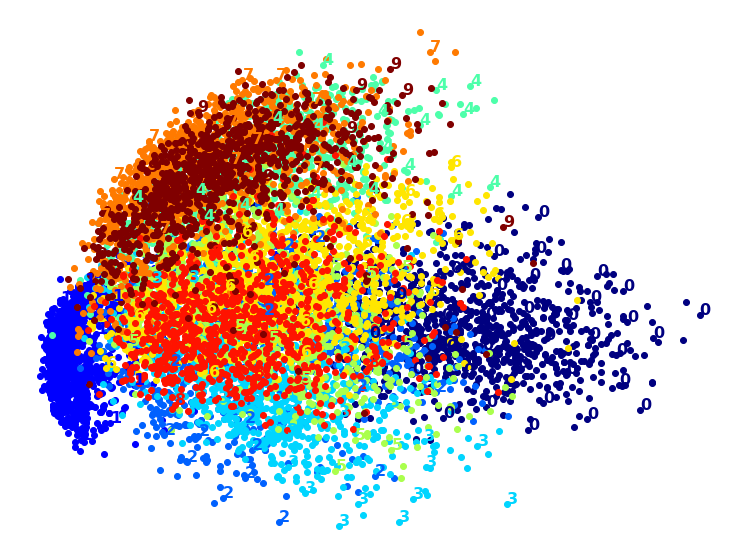

In [21]:
plot_digits(X_reduced_pca, y)
plt.show()

**LLE to reduce to 2 dimensions:**

In [22]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
t0 = time.time()
X_reduced_lle = lle.fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))

PCA took 110.5s.


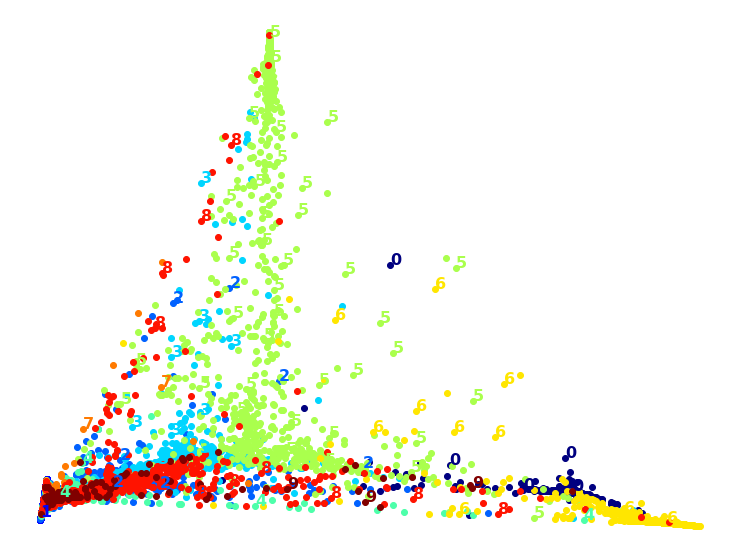

In [23]:
plot_digits(X_reduced_lle, y)
plt.show()

**First apply PCA with an explained variance ratio of 95%, then apply t-SNE to reduce to 2 dimensions:**

In [24]:
from sklearn.manifold import TSNE

pca_ratio = PCA(n_components=0.95, random_state=42)
t0 = time.time()
X_new = pca_ratio.fit_transform(X)
X_pca_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_new)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))

PCA+t-SNE took 57.4s.


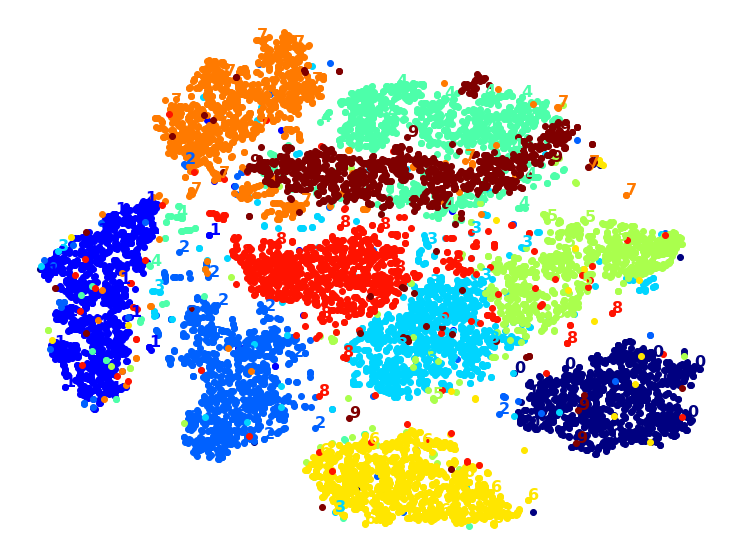

In [25]:
plot_digits(X_pca_tsne_reduced, y)
plt.show()

As above three results, the fastest one is PCA. And the graph of t-SNE has the best performance. 

# 3. k-Means clustering [11 marks]

Hint: It is helpful to read the solution of Chapter 9, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb).

## (a) Chapter 9, Question 10 [6 marks]


The classic Olivetti faces dataset contains 400 grayscale $64\times 64$ pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), and the task is to train a model that can predict which person is represented in each picture. Load the dataset and split it into a training set and a validation set using the code below. Since the dataset is quite small, stratified sampling is used to ensure that there are the same number of images per person in each set. There is no need to create a test set.

In [62]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_olivetti_faces()
# Creating validation set
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=120, random_state=42)
train_idx, val_idx = next(strat_split.split(data.data, data.target))
X_valid, y_valid = data.data[val_idx], data.target[val_idx]
# Creating training set
X_train, y_train = data.data[train_idx], data.target[train_idx]

Note that the dataset is already scaled between 0 and 1, so there is no need to use a standard scaler. Next, use PCA on the features with an explained variance ratio of 99%. Then cluster the images based on the reduced features using k-Means, where the argument `random_state=42` is included. To determine the number of clusters $k\in\{5,10,15,\dots,145\}$, (i) plot inertia, (ii) plot silhouette scores. Choose the number of clusters $k'$ based on (ii). Then (iii) plot silhouette diagrams where the number of clusters is 40 and $k'$, and explain which number of clusters is better. Finally, suppose we use $k'$ clusters, (iv) visualize the clusters by plotting the images in each cluster and comment on whether you see similar faces in each cluster.

**[Add your solution here]**

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)

In [64]:
from sklearn.cluster import KMeans
k_range = range(5,150,5)

kmc_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmc = kmeans.fit(X_train_pca)
    kmc_per_k.append(kmc)

In [65]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmc_per_k]
best_ind = np.argmax(silhouette_scores)
best_k = k_range[best_ind]
best_score = silhouette_scores[best_ind]

In [66]:
inertias = [model.inertia_ for model in kmc_per_k]
best_inertia = inertias[best_ind]

**plot inertia:**

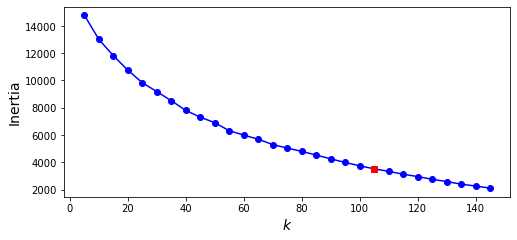

In [67]:
plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

**plot silhouette scores:**

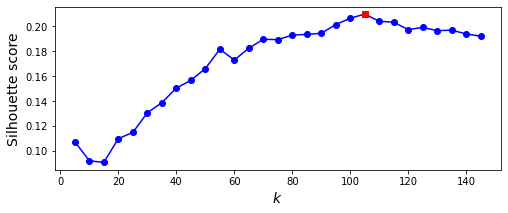

k': 105


In [68]:
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()
print("k':", best_k)

As above, the best k' is 105, which means the best number of cluster k is 105.0.

**plot silhouette diagrams where the number of clusters is 40 and 105:**

40
105


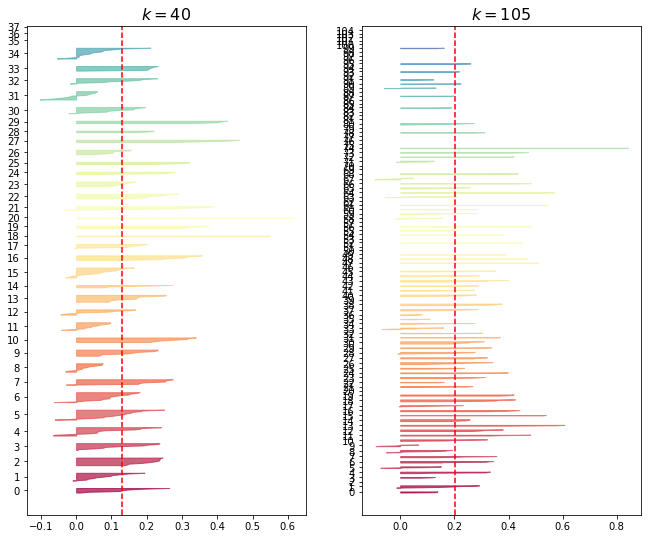

In [69]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))
index = (7,20)
value = (40,105)
for i in (0,1):
    plt.subplot(1, 2,i+1)
    k = index[i]
    k_value = value[i]
    y_pred = kmc_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_train_pca, y_pred)

    padding = len(X_train_pca) // 30
    pos = padding
    ticks = []
    for i in range(k_value):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k_value)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k_value)))
    print(k_value)
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k_value), fontsize=16)

plt.show()

The 105 cluster is better as above plot. 

**visualize the clusters by plotting the images in each cluster:**

In [70]:
best_model = kmc_per_k[best_ind]

Cluster 0


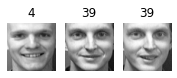

Cluster 1


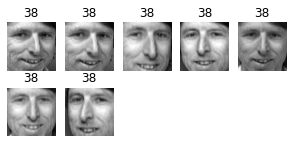

Cluster 2


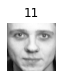

Cluster 3


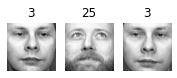

Cluster 4


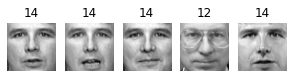

Cluster 5


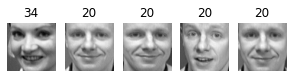

Cluster 6


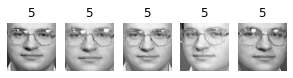

Cluster 7


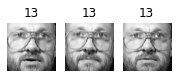

Cluster 8


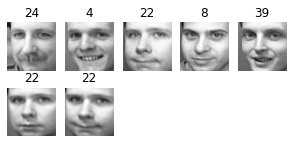

Cluster 9


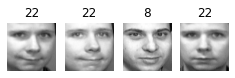

Cluster 10


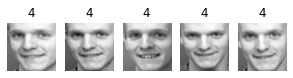

Cluster 11


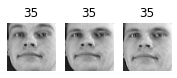

Cluster 12


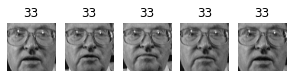

Cluster 13


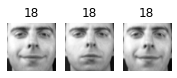

Cluster 14


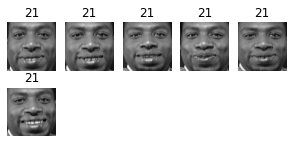

Cluster 15


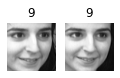

Cluster 16


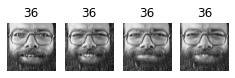

Cluster 17


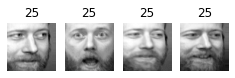

Cluster 18


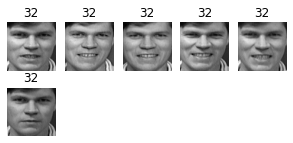

Cluster 19


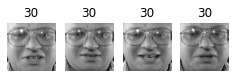

Cluster 20


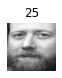

Cluster 21


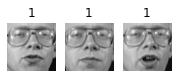

Cluster 22


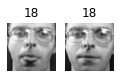

Cluster 23


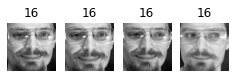

Cluster 24


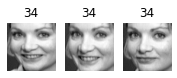

Cluster 25


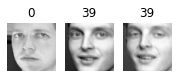

Cluster 26


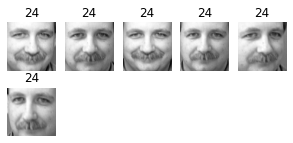

Cluster 27


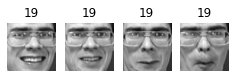

Cluster 28


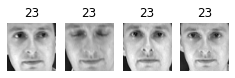

Cluster 29


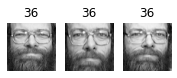

Cluster 30


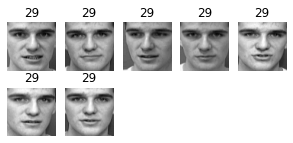

Cluster 31


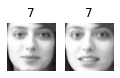

Cluster 32


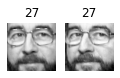

Cluster 33


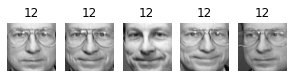

Cluster 34


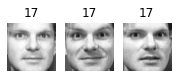

Cluster 35


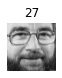

Cluster 36


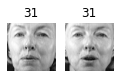

Cluster 37


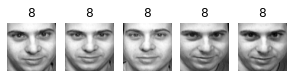

Cluster 38


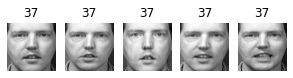

Cluster 39


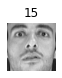

Cluster 40


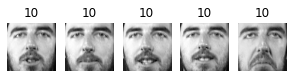

Cluster 41


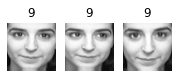

Cluster 42


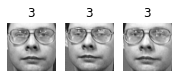

Cluster 43


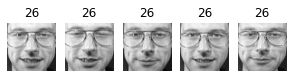

Cluster 44


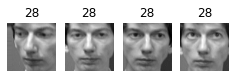

Cluster 45


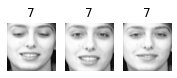

Cluster 46


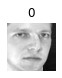

Cluster 47


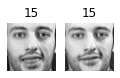

Cluster 48


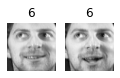

Cluster 49


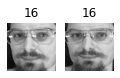

Cluster 50


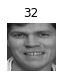

Cluster 51


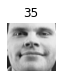

Cluster 52


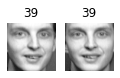

Cluster 53


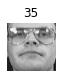

Cluster 54


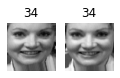

Cluster 55


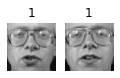

Cluster 56


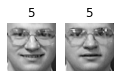

Cluster 57


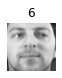

Cluster 58


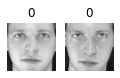

Cluster 59


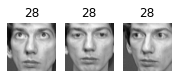

Cluster 60


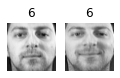

Cluster 61


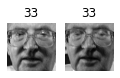

Cluster 62


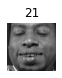

Cluster 63


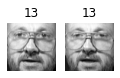

Cluster 64


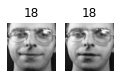

Cluster 65


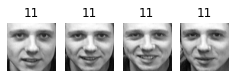

Cluster 66


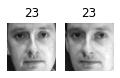

Cluster 67


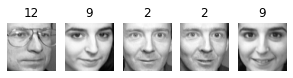

Cluster 68


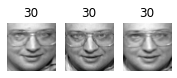

Cluster 69


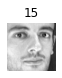

Cluster 70


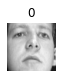

Cluster 71


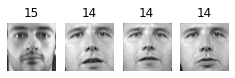

Cluster 72


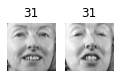

Cluster 73


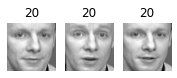

Cluster 74


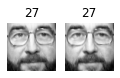

Cluster 75


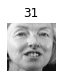

Cluster 76


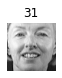

Cluster 77


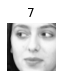

Cluster 78


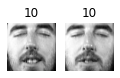

Cluster 79


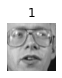

Cluster 80


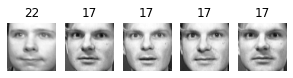

Cluster 81


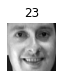

Cluster 82


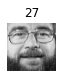

Cluster 83


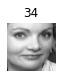

Cluster 84


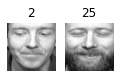

Cluster 85


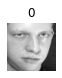

Cluster 86


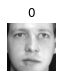

Cluster 87


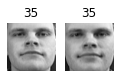

Cluster 88


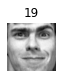

Cluster 89


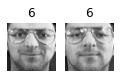

Cluster 90


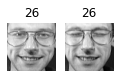

Cluster 91


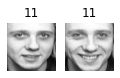

Cluster 92


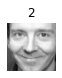

Cluster 93


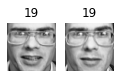

Cluster 94


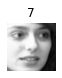

Cluster 95


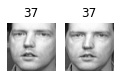

Cluster 96


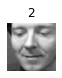

Cluster 97


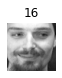

Cluster 98


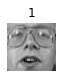

Cluster 99


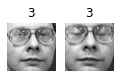

Cluster 100


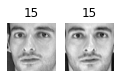

Cluster 101


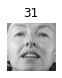

Cluster 102


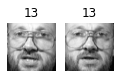

Cluster 103


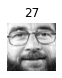

Cluster 104


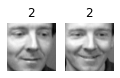

In [71]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_== cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

For most of the cluster, I see very similar face.

## (b) Chapter 9, Question 11  [5 marks]

Continue to use the reduced features based on PCA in (a). Train a random forest classifier `RandomForestClassifier(n_estimators=150, random_state=42)` to predict which person is represented in each picture, and evaluate it on the validation set. Next, use k-Means as a dimensionality reduction tool, and train a classifier. Search for the number of clusters $k\in\{5,10,15,\dots,145\}$ that allows the classifier to get the best performance on the validation set. What performance can you reach on the validation set? What if you append the features from the reduced set to the original features and again search for the best number of clusters?

**[Add your solution here]**

**Train a random forest classifier to predict and evaluate it on the validation set**

In [72]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rnd_clf.fit(X_train_pca, y_train)
rnd_clf.score(X_valid_pca, y_valid)

0.925

In [73]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced = best_model.transform(X_valid_pca)

rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rnd_clf.fit(X_train_reduced, y_train)
    
rnd_clf.score(X_valid_reduced, y_valid)

0.8

In [74]:
from sklearn.pipeline import Pipeline
k_range = range(5,150,5)
for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=42)),
        ("rnd_clf", RandomForestClassifier(n_estimators=150, random_state=42))
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.4166666666666667
10 0.5583333333333333
15 0.6166666666666667
20 0.6833333333333333
25 0.7166666666666667
30 0.7
35 0.7
40 0.725
45 0.775
50 0.7416666666666667
55 0.7166666666666667
60 0.7833333333333333
65 0.7916666666666666
70 0.7916666666666666
75 0.7583333333333333
80 0.7833333333333333
85 0.7416666666666667
90 0.7916666666666666
95 0.7916666666666666
100 0.7916666666666666
105 0.8
110 0.8333333333333334
115 0.825
120 0.7916666666666666
125 0.7916666666666666
130 0.8583333333333333
135 0.8166666666666667
140 0.775
145 0.8


In [75]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
rnd_clf = RandomForestClassifier(n_estimators=150, random_state=42)
rnd_clf.fit(X_train_extended, y_train)
rnd_clf.score(X_valid_extended, y_valid)

0.875

If we set the number of cluster is 130, we can gain 0.8583333333333333 in our performance

# 4. Finding regimes in time series [12 marks]

## (a) [6 marks]
Obtain the daily values of the CPI and unemployment rate from FRED up to 2021-06-01 and then convert the CPI into the yearly inflation rate `inf_data` using the following code. Note that you may have to install the package `pandas_datareader`. Alternatively, you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/91707964/download?download_frd=1).

In [76]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

unemp_data = pdr.get_data_fred('UNRATE', datetime(1945,1,1),datetime(2021,6,1))
cpi_data = pdr.get_data_fred('CPIAUCSL', datetime(1945,1,1),datetime(2021,6,1))
inf_data = (cpi_data/cpi_data.shift(12)-1).iloc[12:]
data = pd.concat([inf_data, unemp_data],axis=1)

Split the data into a training set (before Jan 2005, using `data[:"2005-1-1"]` for instance) and a test set (Jan 2005 and after). Now, ignore the time aspect of your training set by treating it as a 2-dimensional dataset. Use k-means to divide your training set into a number of clusters called **regimes**. To find the number of regimes (clusters) $k\in\{2,3,\dots,10\}$: (i) plot inertia, (ii) plot silhouette scores, (iii) plot silhouette diagrams for $k\in\{2,3,\dots,10\}$. How many regimes do you choose? Explain your answer. Recall that you should use a standard scaler before applying k-means.

**[Add your solution here]**

In [77]:
data

,CPIAUCSL,UNRATE
DATE,,
1948-01-01,0.102421,3.4
1948-02-01,0.094820,3.8
1948-03-01,0.068182,4.0
1948-04-01,0.082727,3.9
1948-05-01,0.093850,3.5
...,...,...
2021-02-01,0.016752,6.2
2021-03-01,0.026584,6.0
2021-04-01,0.041520,6.0


In [79]:
X_train_time = data[:"2005-1-1"]
X_test_time = data["2005-1-1":]

**use a standard scaler :**

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_time)
X_test = scaler.fit_transform(X_test_time)

In [81]:
from sklearn.cluster import KMeans
k_range = range(2,11,1)

kmc_per_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmc = kmeans.fit(X_train)
    kmc_per_k.append(kmc)

In [82]:
kmc_per_k

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42)]

In [83]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train, model.labels_)
                     for model in kmc_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

**plot inertias**

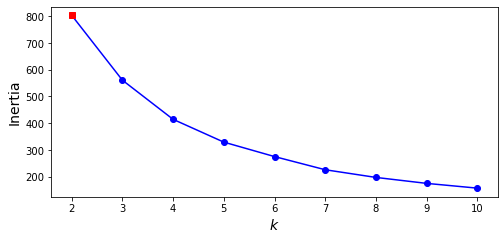

In [85]:
inertias = [model.inertia_ for model in kmc_per_k]
best_inertias = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertias, "rs")
plt.show()

**plot silhouette**

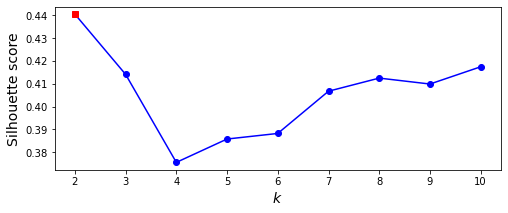

In [86]:
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [87]:
print("The best number of cluster k is {:.1f}.".format(best_k))

The best number of cluster k is 2.0.


**plot silhouette diagrams for  𝑘**

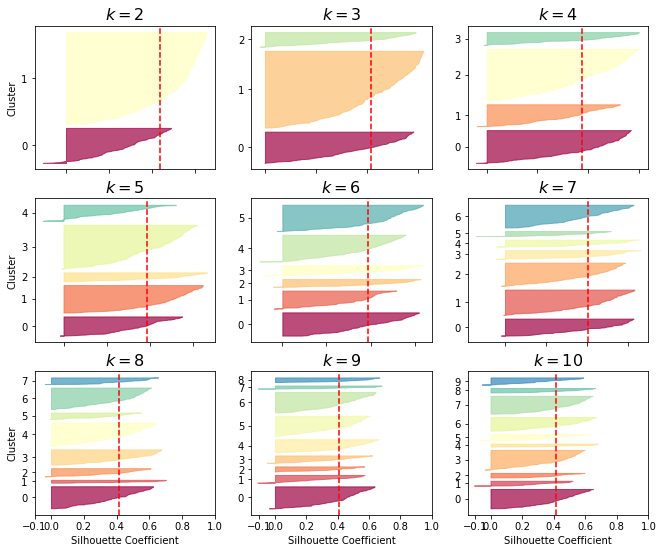

In [88]:
plt.figure(figsize=(11, 9))
for k in range(2, 11):
    plt.subplot(3, 3, k - 1)
    
    y_pred = kmc_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 5, 8):
        plt.ylabel("Cluster")
    
    if k in (8, 9, 10):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


In this sense, $k = 3$ maybe a bit better than others. The clusters are uniform in $k = 3$. And they all cross the dashed line, which represents the mean silhouette score. So, I choose 10 regimes.

## (b) [3 marks]

Report the centroid of the regimes in (a). For the training set, plot the inflation rate (x-axis) vs unemployment rate (y-axis) after these features have been standardized, and show the regimes and centroids in the plot. Also plot time series of the inflation rate and unemployment rate (the original series before standardization), and show the regimes on the plot. The regimes can be shown using time series (line graphs) of the centroid for each of two series for instance.

**[Add your solution here]**

**plot the inflation rate (x-axis) vs unemployment rate (y-axis) after these features have been standardized**

For choose 3 regimes:

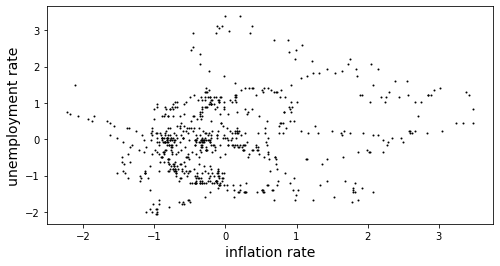

In [89]:
def plot_data(X):
    plt.plot(X[:,0], X[:,1], 'k.', markersize=2)

plt.figure(figsize=(8, 4))
plot_data(X_train)
plt.xlabel("inflation rate", fontsize=14)
plt.ylabel("unemployment rate", fontsize=14)
plt.show()

In [90]:
def plot_data(X):
    plt.plot(X[:,0],X[:,1], 'k.', markersize=2)


In [97]:
def plot_centroids(centroids, weights=None, circle_color='r', cross_color='w'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [93]:
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

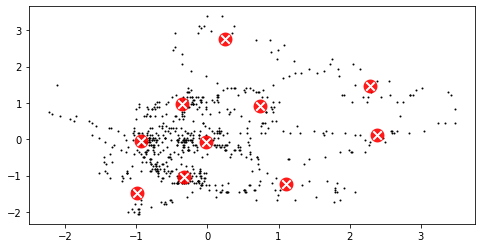

In [98]:
centeroids = kmc.cluster_centers_

plt.figure(figsize=(8, 4))
plot_data(X_train)
plot_centroids(centeroids)
plt.show()

In [99]:
best_model = KMeans(n_clusters=3, random_state=42)
best_model.fit(X_train)
best_centroids = best_model.cluster_centers_
print(best_centroids)

[[ 0.04106717  1.13319855]
 [-0.42903963 -0.5265772 ]
 [ 2.14600121  0.30982341]]


In [100]:
inflation = []
unemplyeement = []
for label in best_model.labels_: 
    if label == 0:
        inflation.append(best_centroids[0][0])
        unemplyeement.append(best_centroids[0][1]) 
    elif label == 1:
        inflation.append(best_centroids[1][0])
        unemplyeement.append(best_centroids[1][1]) 
    else:
        inflation.append(best_centroids[2][0])
        unemplyeement.append(best_centroids[2][1])

In [101]:
time_series_centroid = np.concatenate((np.reshape(np.asarray(inflation),(len(inflation),1)),np.reshape(np.asarray(unemplyeement),(len(unemplyeement),1))), axis =1)
centroid_std = scaler.inverse_transform(time_series_centroid)

**plot time series of the inflation rate and unemployment rate (the original series before standardization), and show the regimes on the plot**

Text(0, 0.5, 'Inflation Rate')

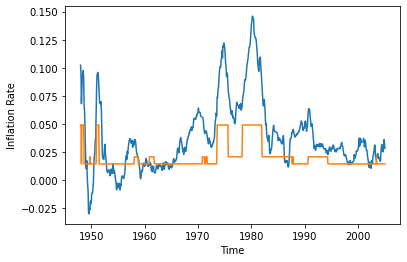

In [103]:
index = 0
plt.plot(X_train_time.index, X_train_time[["CPIAUCSL"]])
plt.plot(X_train_time.index,centroid_std[:,0])
plt.xlabel("Time")
plt.ylabel("Inflation Rate")

Text(0, 0.5, 'Unemployment Rate')

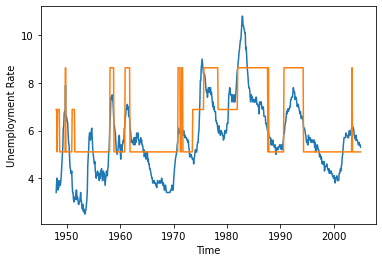

In [104]:
plt.plot(X_train_time.index, X_train_time[["UNRATE"]])
plt.plot(X_train_time.index,centroid_std[:,1])
plt.xlabel("Time")
plt.ylabel("Unemployment Rate")

## (c) [3 marks]

A regime-switching model is a probabilistic model that governs how regime transitions take place. A very simple regime-switching model is a Markov chain. Here, we assume that the next month's regime depends on the current regime. In other words, all we need to know are the **transition probabilities** $p_{i,j} = \mathbb{P}(X_{t+1}=j|X_t=i)$, where $X_t$ is the regime at day $t$. Using the time series of regimes in the training set that you found in (b), estimate these transition probabilities, as follows:
\begin{align*}
    p_{i,j} = \frac{\mathbb{P}(X_{t+1}=j \text{ and } X_t=i)}{\mathbb{P}(X_t=i)}\approx \frac{\text{number of transition from regime $i$ to $j$}}{\text{number of transition from regime $i$}}
\end{align*}
Next, let us check how good your regime switching model is. Calculate the transition probabilities using the test set. Do not retrain your k-means clusterer, simply use it to predict the regimes of the test set. Then, repeat the estimation of the transition probabilities on the test set.

Note: Depending on your choice of $k$, it is possible that some $p_{i,j}$ cannot be estimated due to  having no transitions from regime $i$.

**[Add your solution here]**

In [105]:
regime = np.unique(centroid_std[:,0])
print(regime)

[0.01461255 0.02092866 0.04920948]


**estimation of the transition probabilities on the train set**

In [106]:
temp = np.zeros((3,3))
length = len(centroid_std[:,0])
for i in range(length-1):
    if centroid_std[i,0] - regime[0] < 0.00000001:
        if centroid_std[i+1,0] == regime[0]: 
            temp[0,0] += 1
        elif centroid_std[i+1,0] == regime[1]: 
            temp[0,1] += 1
        else:
            temp[0,2] += 1
    elif centroid_std[i,0] - regime[1] < 0.00000001: 
        if centroid_std[i+1,0] == regime[0]: 
            temp[1,0] += 1
        elif centroid_std[i+1,0] == regime[1]: 
            temp[1,1] += 1
        else:
            temp[1,2]+= 1
    else:
        if centroid_std[i+1,0] == regime[0]:
            temp[2,0] += 1
        elif centroid_std[i+1,0] == regime[1]:
            temp[2,1] += 1 
        else:
            temp[2,2] += 1

print(temp)

[[416.   8.   3.]
 [  9. 165.   1.]
 [  3.   2.  77.]]


In [107]:
prob_matrix = np.zeros((3,3))

for i in range(0,3):
    for j in range(0,3):
        prob_matrix = temp[i,j]/(temp[i,0] + temp[i,1] + temp[i,2])
        print("probability from regime", i, "to regime", j, "is", prob_matrix)

probability from regime 0 to regime 0 is 0.9742388758782201
probability from regime 0 to regime 1 is 0.01873536299765808
probability from regime 0 to regime 2 is 0.00702576112412178
probability from regime 1 to regime 0 is 0.05142857142857143
probability from regime 1 to regime 1 is 0.9428571428571428
probability from regime 1 to regime 2 is 0.005714285714285714
probability from regime 2 to regime 0 is 0.036585365853658534
probability from regime 2 to regime 1 is 0.024390243902439025
probability from regime 2 to regime 2 is 0.9390243902439024


In [108]:
best_model

KMeans(n_clusters=3, random_state=42)

**estimation of the transition probabilities on the test set**

In [109]:
temp_label = best_model.predict(X_test)
test_temp = np.zeros((3,3))
new_length = len(temp_label)
for i in range(new_length-1):
    if temp_label[i] == 0:
        if temp_label[i+1] == 0: 
            test_temp[0,0] += 1
        elif temp_label[i+1] == 1: 
            test_temp[0,1] += 1
        else:
            test_temp[0,2] += 1
    elif temp_label[i] == 1: 
        if temp_label[i+1] == 0: 
            test_temp[1,0] += 1
        elif temp_label[i+1] == 1: 
            test_temp[1,1] += 1
        else:
            test_temp[1,2]+= 1
    else:
        if temp_label[i+1] == 0:
            test_temp[2,0] += 1
        elif temp_label[i+1] == 1:
            test_temp[2,1] += 1 
        else:
            test_temp[2,2] += 1
test_temp

array([[ 61.,   2.,   0.],
       [  2., 100.,   6.],
       [  0.,   5.,  21.]])

In [110]:
test_prob_matrix = np.zeros((3,3))

for i in range(0,3):
    for j in range(0,3):
        test_prob_matrix = test_temp[i,j]/(test_temp[i,0] + test_temp[i,1] + test_temp[i,2])
        print("probability from regime", i, "to regime", j, "is", test_prob_matrix)

probability from regime 0 to regime 0 is 0.9682539682539683
probability from regime 0 to regime 1 is 0.031746031746031744
probability from regime 0 to regime 2 is 0.0
probability from regime 1 to regime 0 is 0.018518518518518517
probability from regime 1 to regime 1 is 0.9259259259259259
probability from regime 1 to regime 2 is 0.05555555555555555
probability from regime 2 to regime 0 is 0.0
probability from regime 2 to regime 1 is 0.19230769230769232
probability from regime 2 to regime 2 is 0.8076923076923077


# 5. Optional exercise: Neural Networks

There is nothing to submit for this exercise. However, it is strongly recommended that you spend time going through this exercise.

Visit the TensorFlow Playground at [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

## (a)
**Layers and patterns:** Try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers, the more complex the patterns can be.

## (b)
**Activation function:** Try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

Try, also, the sigmoid (i.e. the logistic) activation function. Note that it will take significantly more time for the ANN to properly classify the dataset (you should wait until around 900 epochs).

## (c)

**Local minima:** Modify the network architecture to have just one hidden layer with three neurons and the ReLU activation function. Train it multiple times. Between each training, press the reset button next to the play button on the top left. Notice that the training time and the shape of the decision borders varies a lot. If you are patient enough, you will notice that sometimes the network gets stuck in a local minimum which does not properly separate the classes (this happens at random).

## (d)

**Not enough neurons:** Next, remove one neuron so that you have only one hidden layer with 2 neurons. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

## (e)
**Enough neurons:** Next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck at local optima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

## (f)

**DNNs and vanishing gradients:** Now change the dataset to be the spiral (bottom right dataset under “DATA”). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the “vanishing gradients” problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.